# Prediction using Decision Tree Algorithm

## Decision Tree

&emsp;Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. 

![](https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png)

### Construction of Decision Tree : 
&emsp;A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. 
- The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions. 
- The construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery. 
- Decision trees can handle high dimensional data. 
- In general decision tree classifier has good accuracy. 
- Decision tree induction is a typical inductive approach to learn knowledge on classification. 

## iris Dataset

&emsp;The main task on this dataset is to create an iris (name of a flower) classifier based on a given properties that are the **sepal** and **petal** size. If you haven’t know the difference between sepal and petal, here is an image that shows which part of the flower is sepal and which part is petal.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Loading libraries and data

In [44]:
import pandas as pd # data analysis and manipulation tool
import numpy as np # large collection of high-level mathematical functions
import seaborn as sns # used for statistical data visualization

In [45]:
import matplotlib.pyplot as plt # used for programmatic plot generation

In [46]:
# Loading the iris dataset
iris = pd.read_csv("./iris.csv") # a pandas dataframe
iris.set_index("Id", inplace=True) # set the id column as index
iris.head() # first 5 rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
iris.describe() # summary about data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


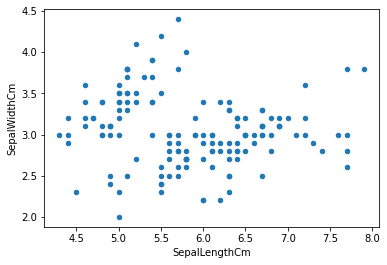

In [48]:
# plotting the iris data
iris.plot(kind="scatter", x="SepalLengthCm",   y="SepalWidthCm") # Make plot of iris dataFrame
plt.show() # display the plot

In [49]:
iris.isnull().any() # checking for null values

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

&emsp;It seems there is no missing value on the dataset. Let’s move on and explore the data a bit.

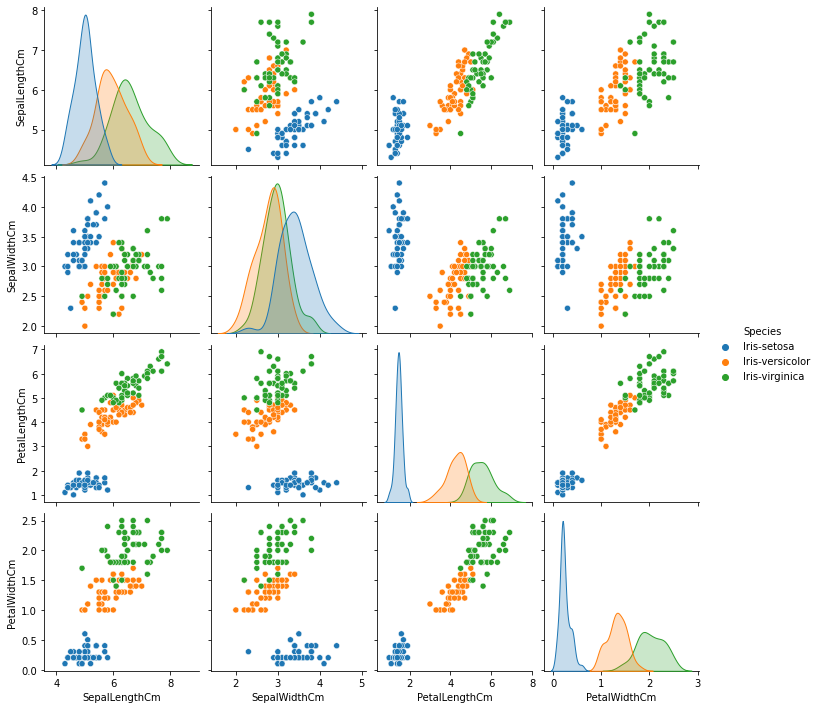

In [50]:
sns.pairplot(iris, hue='Species') # Plot pairwise relationships in a dataset

plt.show() # remove extra marking than plot

&emsp;If you see, most of them already separated based on those properties. However, there are some outliers. Those outliers might be from wrong data or maybe it is really a data anomaly. Let’s assume that it is just a data anomaly to avoid too much assumption

## Splitting the dataset

In [57]:
X = iris.drop("Species", axis=1).values # independent variables
y = iris["Species"] # dependent variable

In [66]:
y_num = y = iris["Species"].replace({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3 })

In [110]:
from sklearn.model_selection import train_test_split # loading the train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y_num, test_size=0.33, random_state=42) # splits into train and test 

## Model Building & Evaluation

In [69]:
from sklearn.tree import DecisionTreeClassifier # Loading the classifier
from sklearn.metrics import accuracy_score # laoding the accuracy metric

In [111]:
tree_clf = DecisionTreeClassifier(random_state=42) # initializing classifier
tree_clf.fit(X_train, y_train) # training the classifier

DecisionTreeClassifier(random_state=42)

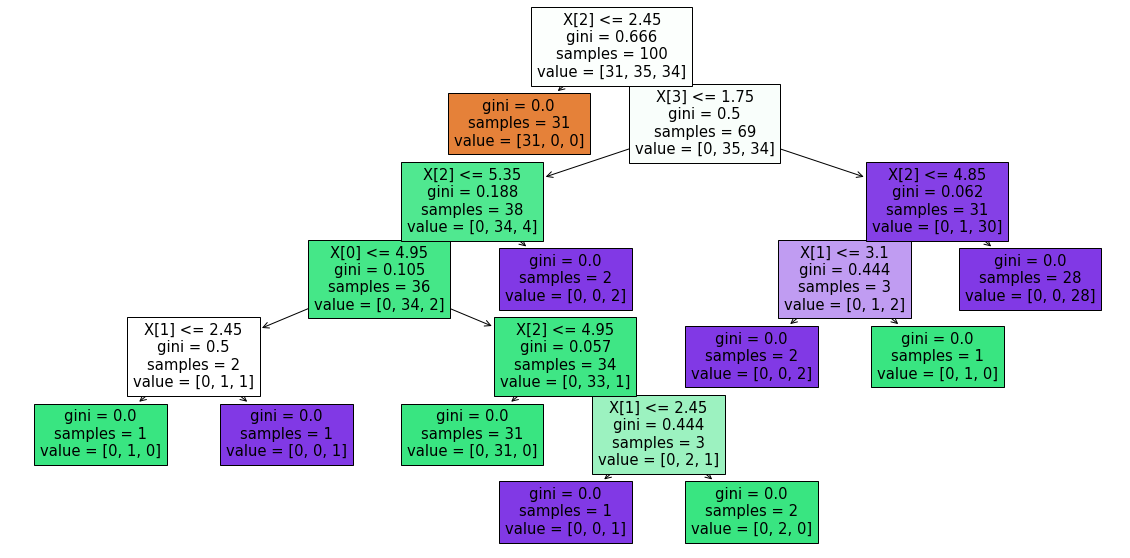

In [112]:
from sklearn.tree import plot_tree # loading the plot tree function

plt.figure(figsize = (20,10)) # setting the figure size

plot_tree(tree_clf, filled=True) # plotting the initial tree

plt.show() # showing only the plot

In [113]:
from sklearn import metrics

y_pred = tree_clf.predict(X_test) # predicting the test data

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # printing the model accuracy

Accuracy: 0.98


In [114]:
pd.crosstab(y_test, y_pred) ## Misclassification table

col_0,1,2,3
Species,,,
1,19,0,0
2,0,15,0
3,0,1,15


&emsp;I suppose this is overfitting

## Post Pruning
&emsp;Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first.
- As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [115]:
path = tree_clf.cost_complexity_pruning_path(X_train, y_train) # getting the effective alphas
ccp_alphas, impurities = path.ccp_alphas, path.impurities # seperating alphas to impurities

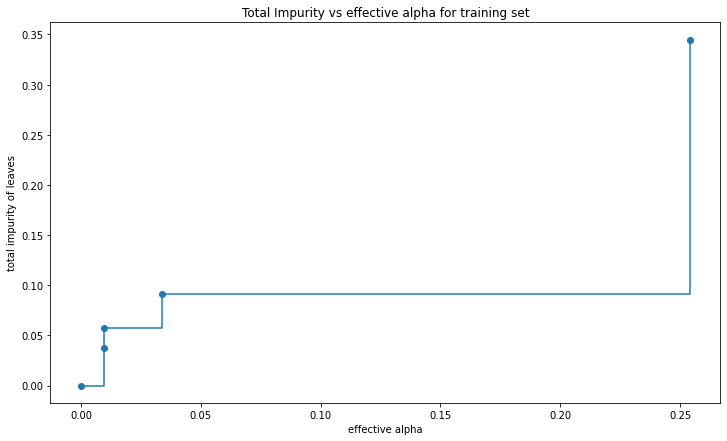

In [116]:
fig, ax = plt.subplots(figsize=(12,7)) # setting the size and axes

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post") # plotting alpha vs impurities
ax.set_xlabel("effective alpha") # set the x-label
ax.set_ylabel("total impurity of leaves") # set the y-label
ax.set_title("Total Impurity vs effective alpha for training set") # set the title

plt.show() # Remove unneccesary details

Next, we train a decision tree using the effective alphas.

In [117]:
clfs = [] # initializing 
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha) # tree for each alpha
    clf.fit(X_train, y_train) # training for each alpha
    clfs.append(clf) # appending the classifier to the list
print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {ccp_alphas[-1]}") # print the results

Number of nodes in the last tree is: 1 with ccp_alpha: 0.32087246376811596


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node

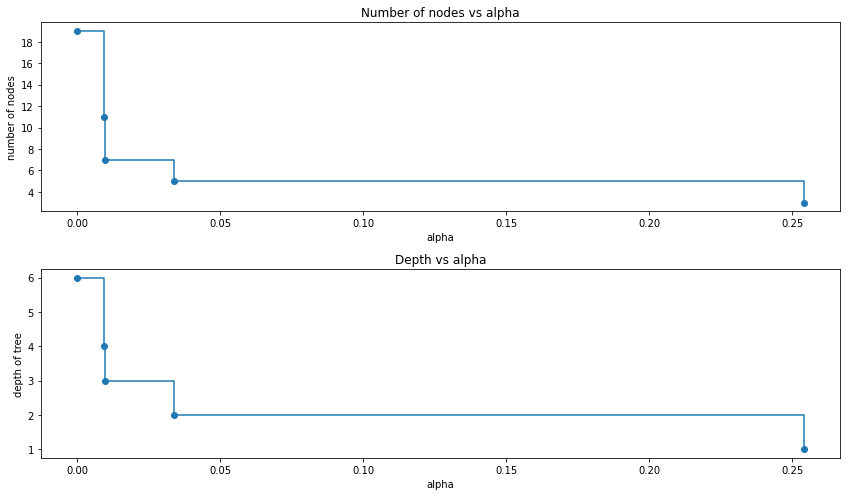

In [118]:
# removing the last classifier
clfs = clfs[:-1] 
ccp_alphas = ccp_alphas[:-1] 

node_counts = [clf.tree_.node_count for clf in clfs] # node counts for each classifier
depth = [clf.tree_.max_depth for clf in clfs] # depth values for each classifier
fig, ax = plt.subplots(2, 1, figsize=(12,7)) # set the axes and create the subplots
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post") # plot aplha vs nodes
ax[0].set_xlabel("alpha") # set x-label for plot-1
ax[0].set_ylabel("number of nodes") # set y-label for plot-1
ax[0].set_title("Number of nodes vs alpha") # set title for plot-1
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post") # plot aplha vs depth
ax[1].set_xlabel("alpha") # set x-label for plot-2
ax[1].set_ylabel("depth of tree") # set y-label for plot-2
ax[1].set_title("Depth vs alpha") # set title for plot-22
fig.tight_layout()

### Accuracy vs alpha

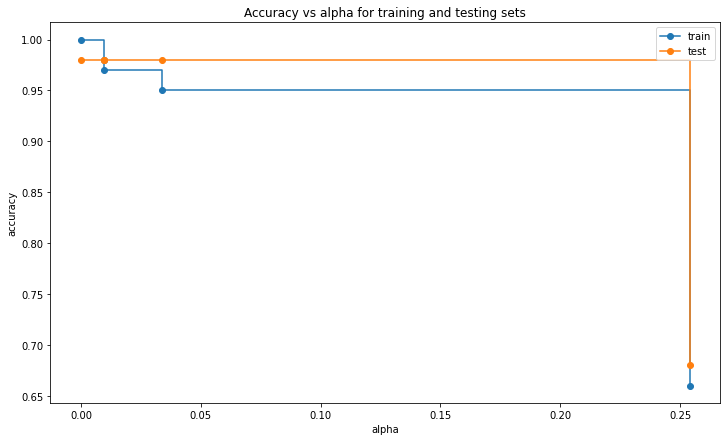

In [119]:
train_scores = [clf.score(X_train, y_train) for clf in clfs] # train scores for all classifiers
test_scores = [clf.score(X_test, y_test) for clf in clfs] # test scores for all classifiers

fig, ax = plt.subplots(figsize=(12,7)) # set the axes and size
ax.set_xlabel("alpha") # set the x-label
ax.set_ylabel("accuracy") # set the y-label
ax.set_title("Accuracy vs alpha for training and testing sets") # set the title
ax.plot(ccp_alphas, train_scores, marker='o', label="train", 
        drawstyle="steps-post") # plot aplha vs train scores 
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post") # plot alpha vs test scores
ax.legend() # adding legend
plt.show() # excluding all other things